<h1> Market Segmentation </h1>

<p>For the following dataset, please determine the best market segmentations for the data below - make sure to plot and explain your results when possible. The dataset is comprised of Satisfaction (discrete) and Loyalty (continuous). Please explain any considerations/assumptions you make as well as any conclusions you draw from the data. Think about these segmentations and think about what other kinds of data that might also lead to a more insightful analysis. Please include all things you tried - both what worked, and what didn't and why (very important).
Please upload your results to Github and email it back to us. Thank you.</p>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import scipy as sp
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

+ In the next few cells, I am getting to know my data and check my data set

In [2]:
df = pd.read_csv(r'C:\Users\Nazanin\Downloads\market_data.csv', sep="\t")
df.head()

,"Satisfaction,Loyalty"
0,"4,-1.33"
1,"6,-0.28"
2,"5,-0.99"
3,"7,-0.29"
4,"4,1.06"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 1 columns):
Satisfaction,Loyalty    480 non-null object
dtypes: object(1)
memory usage: 3.8+ KB


In [4]:
df.isnull().sum()

Satisfaction,Loyalty    0
dtype: int64

In [5]:
df.columns

Index(['Satisfaction,Loyalty'], dtype='object')

In [6]:
df.describe()

,"Satisfaction,Loyalty"
count,480
unique,30
top,"4,-1.33"
freq,16


In [7]:
print(df.columns.dtype)

object


In [8]:
df['Satisfaction,Loyalty'].unique()

array(['4,-1.33', '6,-0.28', '5,-0.99', '7,-0.29', '4,1.06', '1,-1.66',
       '10,-0.97', '8,-0.32', '8,1.02', '8,0.68', '10,-0.34', '5,0.39',
       '5,-1.69', '2,0.67', '7,0.27', '9,1.36', '8,1.38', '7,1.36',
       '7,-0.34', '9,0.67', '10,1.18', '3,-1.69', '4,1.04', '3,-0.96',
       '6,1.03', '9,-0.99', '10,0.37', '9,0.03', '3,-1.36', '5,0.73'],
      dtype=object)

In [9]:
type(df.columns)

pandas.core.indexes.base.Index

In [10]:
df.dtypes

Satisfaction,Loyalty    object
dtype: object

In [11]:
df[['Satisfaction','Loyalty']] = df['Satisfaction,Loyalty'].apply(lambda x: pd.Series(str(x).split(",")))

In [12]:
df = df[['Satisfaction','Loyalty']]

In [13]:
df.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [14]:
df.columns

Index(['Satisfaction', 'Loyalty'], dtype='object')

In [15]:
df.describe()

,Satisfaction,Loyalty
count,480,480
unique,10,25
top,7,-1.69
freq,64,32


In [16]:
print(df.columns.dtype)

object


In [17]:
type(df.columns)

pandas.core.indexes.base.Index

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
Satisfaction    480 non-null object
Loyalty         480 non-null object
dtypes: object(2)
memory usage: 7.6+ KB


In [19]:
df.Satisfaction.astype('float')

0       4.0
1       6.0
2       5.0
3       7.0
4       4.0
5       1.0
6      10.0
7       8.0
8       8.0
9       8.0
10     10.0
11      5.0
12      5.0
13      2.0
14      7.0
15      9.0
16      8.0
17      7.0
18      7.0
19      9.0
20     10.0
21      3.0
22      4.0
23      3.0
24      6.0
25      9.0
26     10.0
27      9.0
28      3.0
29      5.0
       ... 
450     4.0
451     6.0
452     5.0
453     7.0
454     4.0
455     1.0
456    10.0
457     8.0
458     8.0
459     8.0
460    10.0
461     5.0
462     5.0
463     2.0
464     7.0
465     9.0
466     8.0
467     7.0
468     7.0
469     9.0
470    10.0
471     3.0
472     4.0
473     3.0
474     6.0
475     9.0
476    10.0
477     9.0
478     3.0
479     5.0
Name: Satisfaction, Length: 480, dtype: float64

In [20]:
df.Satisfaction.describe() 

count     480
unique     10
top         7
freq       64
Name: Satisfaction, dtype: object

In [21]:
type(df['Satisfaction'])

pandas.core.series.Series

In [22]:
df['Satisfaction'] = df.Satisfaction.astype('float')

In [23]:
df.Satisfaction.describe()  

count    480.000000
mean       6.400000
std        2.579508
min        1.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: Satisfaction, dtype: float64

In [24]:
df.Loyalty.astype('float')

0     -1.33
1     -0.28
2     -0.99
3     -0.29
4      1.06
5     -1.66
6     -0.97
7     -0.32
8      1.02
9      0.68
10    -0.34
11     0.39
12    -1.69
13     0.67
14     0.27
15     1.36
16     1.38
17     1.36
18    -0.34
19     0.67
20     1.18
21    -1.69
22     1.04
23    -0.96
24     1.03
25    -0.99
26     0.37
27     0.03
28    -1.36
29     0.73
       ... 
450   -1.33
451   -0.28
452   -0.99
453   -0.29
454    1.06
455   -1.66
456   -0.97
457   -0.32
458    1.02
459    0.68
460   -0.34
461    0.39
462   -1.69
463    0.67
464    0.27
465    1.36
466    1.38
467    1.36
468   -0.34
469    0.67
470    1.18
471   -1.69
472    1.04
473   -0.96
474    1.03
475   -0.99
476    0.37
477    0.03
478   -1.36
479    0.73
Name: Loyalty, Length: 480, dtype: float64

In [25]:
df['Loyalty'] = df.Loyalty.astype('float')

In [26]:
df.Loyalty.describe()

count    480.000000
mean       0.001000
std        1.000434
min       -1.690000
25%       -0.970000
50%        0.150000
75%        1.020000
max        1.380000
Name: Loyalty, dtype: float64

In [27]:
df.Satisfaction.describe() 

count    480.000000
mean       6.400000
std        2.579508
min        1.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: Satisfaction, dtype: float64

+ After fixing the data types and splitting the columns and other house keepings, let's see how the data looks like -- data visualization

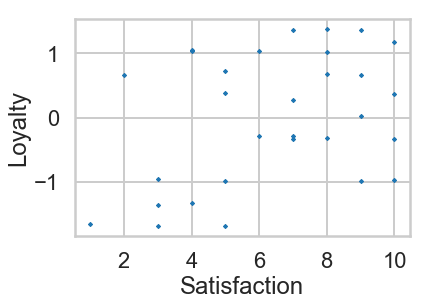

In [28]:
plt.scatter(df.Satisfaction, df.Loyalty, s=2)
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

+ In order to segment the market, we need a way to compare them. To do this we're going to use K-Means clustering (mainly used for market segmentation). K-means is a way of taking a dataset and finding groups (or clusters) of points that have similar properties. The grouping is such that the distance between all the points and the midpoint of the cluster they belong to is minimized.
 
+ Since we're trying to learn more about the market behavier, we can use their behavior (Loyalty) as a way to group similar minded groups together. We can then study those groups to look for patterns and trends which can help us formulate future behavier. The only thing is that we are given only Satisfaction and Loyalty so there is not so much to play with and dissect but let's see what we can get with what we are given! 

In [39]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

+ K-means method is an unsupervised ML algorithm. I will now vary the number of my clusters and see the outcomes. 

In [30]:
cluster = KMeans(n_clusters=3)   #unsupervised 
# slice matrix so we only include the 0/1 indicator columns in the clustering
df['cluster'] = cluster.fit_predict(df[['Satisfaction', 'Loyalty']])
df.cluster.value_counts()

1    192
0    192
2     96
Name: cluster, dtype: int64

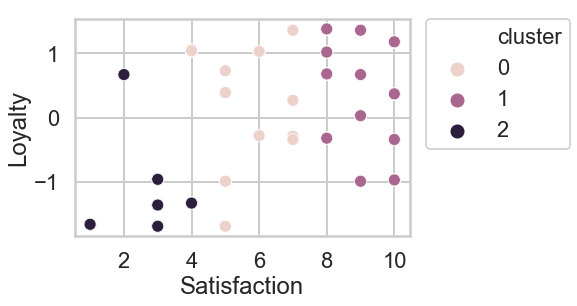

In [36]:
sns.scatterplot(x ='Satisfaction', y= 'Loyalty', data = df , hue = 'cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #there is a good separate here 

In [40]:
silhouette_score(df[['Satisfaction', 'Loyalty']], df.cluster) #unsupervised 

0.473078055293308

In [43]:
cluster = KMeans(n_clusters=2)   #unsupervised 
# slice matrix so we only include the 0/1 indicator columns in the clustering
df['cluster'] = cluster.fit_predict(df[['Satisfaction', 'Loyalty']])
df.cluster.value_counts()

1    272
0    208
Name: cluster, dtype: int64

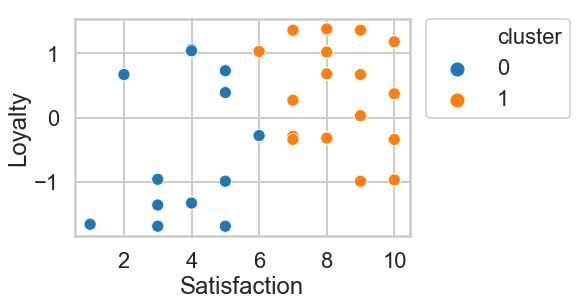

In [44]:
sns.scatterplot(x ='Satisfaction', y= 'Loyalty', data = df , hue = 'cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

In [45]:
silhouette_score(df[['Satisfaction', 'Loyalty']], df.cluster) #unsupervised 

0.561428322420888

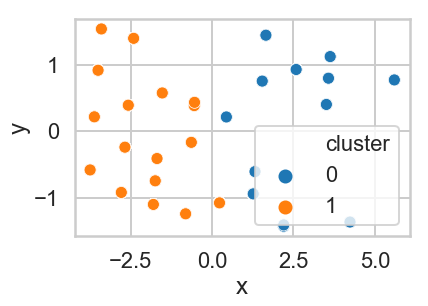

In [51]:
sns.scatterplot(x ='x', y= 'y', data = df , hue = 'cluster')  #should I even plot this???

+ As we saw, the cluster number 2 gave us a better value and the score of 0.56 is actually pretty good! Which means that there is a good separate here with n = 2. 

+ Kmeans model clustering quality is good based on this metric 

In [46]:
pca = PCA(n_components=2)  
df['x'] = pca.fit_transform(df[['Satisfaction' , 'Loyalty']])[:,0]
df['y'] = pca.fit_transform(df[['Satisfaction' , 'Loyalty']])[:,1]
#df = df.reset_index()
df.head()

,Satisfaction,Loyalty,cluster,x,y
0,4.0,-1.33,0,2.582913,0.927428
1,6.0,-0.28,0,0.440007,0.212967
2,5.0,-0.99,0,1.541231,0.752786
3,7.0,-0.29,1,-0.545350,0.383763
4,4.0,1.06,0,2.198298,-1.431422


C:\Users\Nazanin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


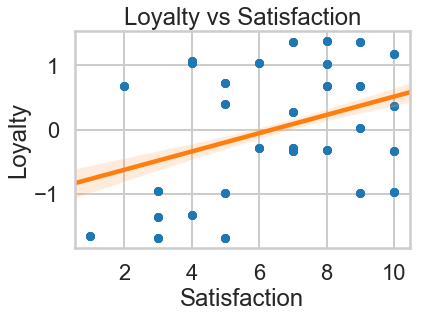

In [47]:
# Linear Regression (just to check) 
# Calculate Peason's R for each feature:

correlation = df.corr()
#correlation.iloc[[-1]]
# reg plot: # Rooms v Median Home Value
sns.regplot(x='Satisfaction', y='Loyalty', data=df, fit_reg = True, scatter_kws={'color': 'C0', 'alpha':0.3, 's':60}, 
            line_kws={'color': 'C1'})
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.title('Loyalty vs Satisfaction');



In [48]:
m = ols('Loyalty ~ Satisfaction',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                Loyalty   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     74.37
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           9.60e-17
Time:                        16:49:11   Log-Likelihood:                -646.09
No. Observations:                 480   AIC:                             1296.
Df Residuals:                     478   BIC:                             1305.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9098      0.114     -7.991   

+ Having one feature obviously would not be a good linear model but at least we checked! 

In [49]:
from sklearn.linear_model import LinearRegression
X = df.drop('Loyalty', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

lm.fit(X, df.Loyalty)
lm.coef_
lm.intercept_

0.0010000000000005393

In [50]:
print(lm.score(X, df.Loyalty))   

1.0


In [52]:
#SVM 
from sklearn import svm

In [53]:
X = df[['Satisfaction']]
y = df.Loyalty
clf = svm.SVR()
clf.fit(X, y) 


C:\Users\Nazanin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
print(clf.score(X, df.Loyalty)) #this is the R^2 score which is pretty bad 

0.269126880772005
